In [4]:
# Libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [13]:
import time
from random import randint
from selenium import webdriver
import seaborn as sn
import matplotlib.pyplot as plt

# Scrape the front page

We scrape the home page of the website(www.holidify.com). And collect different attributes of the tourist locations.

In [8]:
# Send a get request
response = requests.get("https://www.holidify.com/explore/")
print(response)
# Create soup object
soup_obj=BeautifulSoup(response.text,'html.parser')
soup_obj.prettify


<Response [200]>


<bound method Tag.prettify of 
<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

<html>
<head>
<script>
            dataLayer = [{ 'pageType': 'Explore' }];
        </script>
<title> Best Places to Visit in India | Explore India Tourism | Holidays in India </title>
<link href="/res/images/favicon.png" rel="icon" sizes="32x32" type="image/x-icon"/>
<link href="/manifest.json" rel="manifest"/>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="utf-8" http-equiv="encoding"/>
<meta content="Explore More than 1000 holiday ideas in India. Holidify is India's Best Platform To Search for Places to go, plan your trip and get customised packages from travel agents." name="description">
<link as="font" crossorigin="anonymous" href="/res/fonts/manrope-bold.otf" rel="preload"/>
<link as="font" crossorigin="anonymous" href="/res/fonts/manrope-regular.otf" rel="preload"/>
<meta content="Things to do, plan your trips

In [17]:
# Title of the page
soup_obj.head.title.string

' Best Places to Visit in India | Explore India Tourism | Holidays in India '

In [9]:
# Scrape Place name, State, Rating, Best time, Attractions of the tourists places 
place = pd.DataFrame()
each_state=soup_obj.find_all('div',class_='col-12 col-md-6 pr-lg-3 pl-md-3 pl-lg-0 result')

for state_element in each_state:
    place_name=state_element.find('h3',class_='card-heading').get_text()
    rating=state_element.find('span',class_='rating-badge').text[1:4]
    
    try:
        best_times=state_element.find_all('p',class_='mb-3')[1].get_text()
    except IndexError:
        best_times=state_element.find_all('p',class_='mb-3')[0].get_text()
        
    try:
        package_minrate=state_element.find('p',class_='collection-cta').get_text().replace('\n','')
    except AttributeError:
        package_minrate='NA'
    
    try:
        attractions=state_element.find_all('div',class_='content-card-footer')[0].get_text().replace('\n','').replace('\t','')
    except AttributeError:
        attractions='NA'
            
    data = pd.DataFrame([[place_name,rating,best_times,attractions,package_minrate]])
    place = place.append(data, ignore_index = True)

place.head()


,0,1,2,3,4
0,"1. Gangtok, Sikkim",4.4,Best Time: Throughout the year,Read More 33 Gangtok Attr...,"View packages starting from ₹ 4,190"
1,"2. Darjeeling, West Bengal",4.3,"Best Time: February to March, September to De...",Read More 23 Darjeeling A...,"View packages starting from ₹ 5,260"
2,3. Goa,4.5,Best Time: October to March,Read More 197 Goa Attract...,"View packages starting from ₹ 4,100"
3,"4. Mcleodganj, Himachal Pradesh",4.3,Best Time: October to June,Read More 23 Mcleodganj A...,"View packages starting from ₹ 10,000"
4,"5. Munnar, Kerala",4.5,Best Time: September to May,Read More 46 Munnar Attra...,"View packages starting from ₹ 4,498"


In [10]:
# copy data to another dataframe to keep original df intact
places_=place.copy()
places_

,0,1,2,3,4
0,"1. Gangtok, Sikkim",4.4,Best Time: Throughout the year,Read More 33 Gangtok Attr...,"View packages starting from ₹ 4,190"
1,"2. Darjeeling, West Bengal",4.3,"Best Time: February to March, September to De...",Read More 23 Darjeeling A...,"View packages starting from ₹ 5,260"
2,3. Goa,4.5,Best Time: October to March,Read More 197 Goa Attract...,"View packages starting from ₹ 4,100"
3,"4. Mcleodganj, Himachal Pradesh",4.3,Best Time: October to June,Read More 23 Mcleodganj A...,"View packages starting from ₹ 10,000"
4,"5. Munnar, Kerala",4.5,Best Time: September to May,Read More 46 Munnar Attra...,"View packages starting from ₹ 4,498"
5,"6. Coorg, Karnataka",4.2,Best Time: October to March,Read More 36 Coorg Attrac...,"View packages starting from ₹ 7,009"
6,"7. Manali, Himachal Pradesh",4.5,Best Time: October to June,Read More 43 Manali Attra...,"View packages starting from ₹ 1,900"
7,"8. Ooty, Tamil Nadu",4.2,Best Time: Throughout the year,Read More 43 Ooty Attract...,NA
8,"9. Kasol, Himachal Pradesh",4.4,Best Time: October to June,Read More 20 Kasol Attrac...,"View packages starting from ₹ 4,800"
9,"10. Shimla, Himachal Pradesh",4.2,Best Time: October to June,Read More 56 Shimla Attra...,"View packages starting from ₹ 6,500"


# Scrape multiple pages

We scrape the links from the home page. And we scrape the necessary information from the each links web pages.

In [20]:
# Get all the URL's to scrape
links=[]
for link in each_state:
    links.append(link.find('a').attrs['href'])
links=['https://www.holidify.com'+link for link in links if link.strip()]
print(links)

['https://www.holidify.com/places/gangtok/', 'https://www.holidify.com/places/darjeeling/', 'https://www.holidify.com/places/goa/', 'https://www.holidify.com/places/udaipur/', 'https://www.holidify.com/places/agra/', 'https://www.holidify.com/places/mcleodganj/', 'https://www.holidify.com/places/munnar/', 'https://www.holidify.com/places/coorg/', 'https://www.holidify.com/places/manali/', 'https://www.holidify.com/places/hampi/', 'https://www.holidify.com/places/ooty/', 'https://www.holidify.com/places/jaipur/', 'https://www.holidify.com/places/kasol/', 'https://www.holidify.com/places/shimla/', 'https://www.holidify.com/places/nainital/', 'https://www.holidify.com/places/dalhousie/', 'https://www.holidify.com/places/wayanad/', 'https://www.holidify.com/places/pondicherry/', 'https://www.holidify.com/places/auli/', 'https://www.holidify.com/places/alleppey/', 'https://www.holidify.com/places/delhi/', 'https://www.holidify.com/places/mussoorie/', 'https://www.holidify.com/places/rishike

In [149]:
# Scrape number of ratings and Ideal duration from each URL
places=pd.dataframe()
#for link in links:
    try:
        driver=webdriver.Chrome('C:/Webdrivers/chromedriver.exe')
        driver.get(link)
        sleep(randint(2,10))
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        num_of_ratings=soup.find_all('a',class_='num-reviews')[0].get_text()
        ideal_duration=soup.find_all('div',class_='col-12 col-md-6')[1].get_text()
        
    except AttributeError:
        num_of_ratings=ideal_duration='NA'
        
    except requests.exceptions.RequestException as error:
        num_of_ratings=ideal_duration='NA'
        print ("oops: Something Else occured",error)
      
    data=pd.DataFrame([[num_of_ratings,ideal_duration]])
    places = places.append(data, ignore_index=True)
    driver.close()
print(places.head())





           0                               1    2    3    4
0  267 votes  \nIdeal duration:  2-4 days \n  NaN  NaN  NaN
1  280 votes  \nIdeal duration:  2-3 days \n  NaN  NaN  NaN
2  601 votes  \nIdeal duration:  3-7 days \n  NaN  NaN  NaN
3  263 votes  \nIdeal duration:  2-3 days \n  NaN  NaN  NaN
4  352 votes  \nIdeal duration:  1-2 days \n  NaN  NaN  NaN


In [473]:
# copy data to avoid changing original data as i dont have places df defined

places2=places.copy()
places2.head()

,0,1,2,3,4
0,267 votes,\nIdeal duration: 2-4 days \n,NaN,NaN,NaN
1,280 votes,\nIdeal duration: 2-3 days \n,NaN,NaN,NaN
2,601 votes,\nIdeal duration: 3-7 days \n,NaN,NaN,NaN
3,263 votes,\nIdeal duration: 2-3 days \n,NaN,NaN,NaN
4,352 votes,\nIdeal duration: 1-2 days \n,NaN,NaN,NaN


# Data cleaning

Because this is a scraped data, it contains lot of unwanted text. Here we clean the scraped data to get the data to the desired format.
Once we have desired data we export it to a csv file which we need for analysis. 

In [436]:
# Data cleaning and extracting only the necessary information
places_[['place','state']]=places_[0].str.replace(r'[\d+,.,,]', '').str.split(n=1,expand=True)
places_['season']=places_[2].str.replace('Best Time:','')
places_[['number of attractions']]=places_[3].str.extract('(\d+)')
places_[['package rate']]=places_[4].str.replace(',','').str.extract('(\d+)')
places_=places_.drop(columns=[0,2,3,4])
places_.rename(columns={1:'ratings'},inplace=True)

# Substitute the correct name for state and place column cells
places_.loc[[2,17,20,28,36,50],'state']=['Goa','Pondicherry','Delhi','Karnataka','Maharastra','Assam']
places_.loc[[28,36,50],'place']=['Nandhi Hills','Ajanta and Ellora Caves','Kaziranga National Park']
places_.head(60)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,ratings,place,state,season,number of attractions,package rate
0,4.4,Gangtok,Sikkim,Throughout the year,33,11934
1,4.3,Darjeeling,West Bengal,"February to March, September to December",23,8375
2,4.5,Goa,Goa,October to March,197,4100
3,4.3,Udaipur,Rajasthan,October to March,34,5228
4,4.2,Agra,Uttar Pradesh,October to March,17,NaN
5,4.3,Mcleodganj,Himachal Pradesh,October to June,23,10000
6,4.5,Munnar,Kerala,September to May,46,4498
7,4.2,Coorg,Karnataka,October to March,36,7009
8,4.5,Manali,Himachal Pradesh,October to June,43,3999
9,4.5,Hampi,Karnataka,October to March,31,NaN


In [440]:
# Update the missing package rate with values
values=[7000,4000,21458,2160,12500,100,10710,700,1029,700,2500,990,2200,3800,7500,2575,4688,4200,15000,9000,3000,1000,2550]
locations=places_['package rate'].isnull()
places_.loc[locations,'package rate']=values
places_.loc[50,'number of attractions']=26
places_.head(60)

,ratings,place,state,season,number of attractions,package rate
0,4.4,Gangtok,Sikkim,Throughout the year,33,11934
1,4.3,Darjeeling,West Bengal,"February to March, September to December",23,8375
2,4.5,Goa,Goa,October to March,197,4100
3,4.3,Udaipur,Rajasthan,October to March,34,5228
4,4.2,Agra,Uttar Pradesh,October to March,17,7000
5,4.3,Mcleodganj,Himachal Pradesh,October to June,23,10000
6,4.5,Munnar,Kerala,September to May,46,4498
7,4.2,Coorg,Karnataka,October to March,36,7009
8,4.5,Manali,Himachal Pradesh,October to June,43,3999
9,4.5,Hampi,Karnataka,October to March,31,4000


In [474]:
# Cleaning the second dataframe
places2[['number of ratings']]=places2[0].str.extract('(\d+)')
places2[['a','b','ideal duration(days)','c']]=places2[1].str.split(n=4,expand=True)
places2=places2.drop(columns=[0,1,2,3,4,'a','b','c'])
places2.head()

,number of ratings,ideal duration(days)
0,267,2-4
1,280,2-3
2,601,3-7
3,263,2-3
4,352,1-2


In [11]:
# Concatenating two dataframes
clean_data=pd.concat([places_,places2],axis=1)
clean_data=clean_data[['place','state','season','ratings','number of ratings','number of attractions','ideal duration(days)','package rate']]
clean_data.head(60)

NameError: name 'places2' is not defined

In [481]:
# convert the dataframe into a csv file
clean_data.to_csv(r'Documents\scrape holidify.csv')

In [2]:
clean_data.head()

NameError: name 'clean_data' is not defined

# Exploratory Data Analysis

This is an exploratory data analysis where I explore the dataset and find some important insights.
Also i want to answer some specific questions below.

1. what are the top 5  best places to visit in india
2. what are the cheapest packages that this travel agency provides
3. what are the best places to visit in india all season
4. which state attracts more tourists


In [75]:
clean_data=pd.read_csv('Documents\scrape holidify.csv')
clean_data.head(60)

,Unnamed: 0,place,state,season,ratings,number of ratings,number of attractions,ideal duration(days),package rate
0,0,Gangtok,Sikkim,Throughout the year,4.4,267,33,2-4,11934
1,1,Darjeeling,West Bengal,"February to March, September to December",4.3,280,23,2-3,8375
2,2,Goa,Goa,October to March,4.5,601,197,3-7,4100
3,3,Udaipur,Rajasthan,October to March,4.3,263,34,2-3,5228
4,4,Agra,Uttar Pradesh,October to March,4.2,352,17,1-2,7000
5,5,Mcleodganj,Himachal Pradesh,October to June,4.3,298,23,2-3,10000
6,6,Munnar,Kerala,September to May,4.5,506,46,2-3,4498
7,7,Coorg,Karnataka,October to March,4.2,432,36,2-3,7009
8,8,Manali,Himachal Pradesh,October to June,4.5,466,43,2-4,3999
9,9,Hampi,Karnataka,October to March,4.5,209,31,2-4,4000


In [4]:
clean_data.shape

(60, 9)

In [5]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             60 non-null     int64  
 1   place                  60 non-null     object 
 2   state                  60 non-null     object 
 3   season                 60 non-null     object 
 4   ratings                60 non-null     float64
 5   number of ratings      60 non-null     int64  
 6   number of attractions  60 non-null     int64  
 7   ideal duration(days)   60 non-null     object 
 8   package rate           60 non-null     int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 4.3+ KB


In [76]:
clean_data.describe()

,Unnamed: 0,ratings,number of ratings,number of attractions,package rate
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,29.500000,4.270000,203.116667,34.483333,6232.816667
std,17.464249,0.194239,131.356430,32.505276,4260.649531
min,0.000000,3.700000,29.000000,4.000000,100.000000
25%,14.750000,4.100000,102.250000,13.500000,2893.750000
50%,29.500000,4.300000,182.000000,30.000000,6198.000000
75%,44.250000,4.400000,286.250000,39.000000,8093.750000
max,59.000000,4.700000,601.000000,197.000000,21458.000000


###### 1. Top 5 best places to visit

We find best places to visit by considering not only their ratings, but also by their number of ratings and number of attractions. And we plot the best places to visit.

In [15]:
# condition on ratings column
plt.figure(figsize=(8,6))
top_place=clean_data.loc[(clean_data['ratings'] >= 4.5)]
print('summary of number of attractions:\n', clean_data['number of attractions'].describe())
sn.barplot(x='place',y='ratings',data=top_place)

NameError: name 'clean_data' is not defined

<Figure size 576x432 with 0 Axes>

-  __Majuli__ and __Tawang__ are the high rated places in india by Holidify users, gets __4.7__ ratings. but their number of ratings is low.
-  Well known places like __Goa, Munnar, Manali__ got __4.5__ ratings and their number of ratings also high.
   they have 400 and above ratings.
-  These places number of attractions are high, falls around 75th quartile. their number of attractions are mostly above 30.
-  __Goa__ has predominantly high number of attractions. it has __197__ attractions to explore.

##### 2. states that attracts more tourists

               state  number of ratings
0  Himachal Pradesh                1762
1         Karnataka                1543
2            Kerala                1530
3       Uttarakhand                1085
4        Tamil Nadu                 964


<AxesSubplot:xlabel='state', ylabel='number of ratings'>

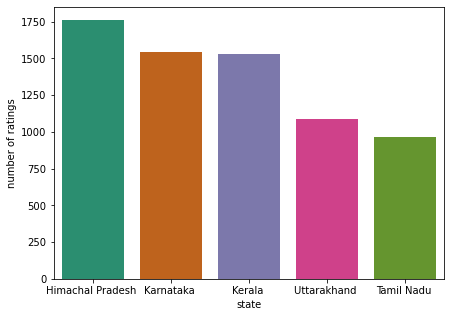

In [116]:
# Grouping states to find number of ratings
plt.figure(figsize=(7,5))
top_state=clean_data.groupby(["state"]).agg({'number of ratings':'sum'}).nlargest(5,'number of ratings').reset_index()
print(top_state)
sn.barplot(x='state',y='number of ratings',data=top_state,palette='Dark2')

-  __Himachal Pradesh__ tops the list of states that attracts more tourists. It has __1762 total ratings__.
     himachal's one of the prominent industry is tourism industry. Its evident in the number of people it attracts. 
-  Himachal is followed by karnataka and kerala ,they get 1543, 1530 ratings respectively.

##### 3. Best places to visit throughout the year

In [87]:
# applying condition to find best place to visit throughout the year
clean_data['season']=clean_data['season'].str.strip()
clean_data.loc[(clean_data['season'] == 'Throughout the year') & (clean_data['ratings'] >= 4.3)]

,Unnamed: 0,place,state,season,ratings,number of ratings,number of attractions,ideal duration(days),package rate
0,0,Gangtok,Sikkim,Throughout the year,4.4,267,33,2-4,11934
14,14,Nainital,Uttarakhand,Throughout the year,4.3,235,31,2-3,6999
16,16,Wayanad,Kerala,Throughout the year,4.3,288,34,1-2,2160
22,22,Rishikesh,Uttarakhand,Throughout the year,4.3,239,53,2-3,6396
23,23,Gokarna,Karnataka,Throughout the year,4.3,160,16,2-3,100
24,24,Khajjiar,Himachal Pradesh,Throughout the year,4.3,132,9,1,4000
30,30,Ziro,Arunachal Pradesh,Throughout the year,4.4,31,8,2,6000
41,41,Matheran,Maharashtra,Throughout the year,4.3,211,29,1-2,3800
49,49,Varkala,Kerala,Throughout the year,4.4,137,24,1-2,9000


-  Based on holidify users reviews __Gangtok(sikkim)__ is the best place to visit throughout the year.
-  varkala and ziro are also the best places to visit throughout the year.

##### 4. cheapest package price

<AxesSubplot:xlabel='place', ylabel='package rate'>

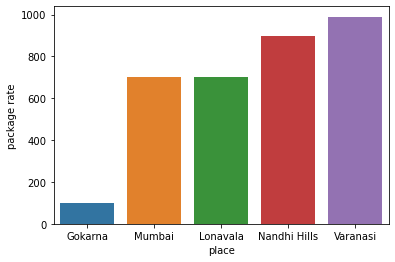

In [106]:
# cheapest prices
low_price=clean_data.nsmallest(5,'package rate')
sn.barplot(x='place',y='package rate',data=low_price)

-  Surprisingly, __Gokarna__(Karnataka) package starts even for __Rs 100__. I cheked with the website they provide some
   activities in gokarna for Rs 100.
-  The next cheapest available package is for Mumbai and lonavala, both are in maharastra.
   And their starting price is Rs 700.

##### Other important findings

we need to know the distribution of the ratings data so that we can know the variability and spread of the ratings
for that we plot boxplot and histogram.

<AxesSubplot:xlabel='ratings'>

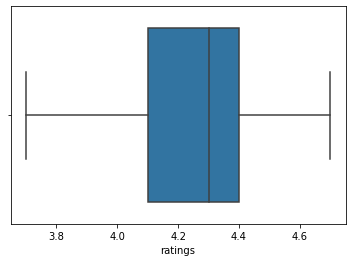

In [19]:
# boxplot and histogram for the distribution of the ratings
sn.boxplot(data=clean_data,x='ratings')

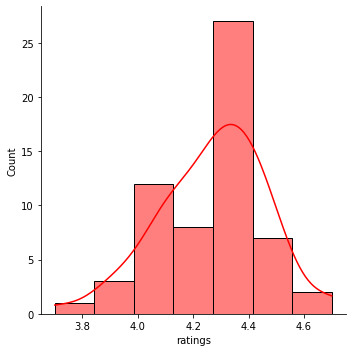

In [118]:
sn.displot(clean_data,x='ratings',kde=True,color='r')

-  Half of the places has ratings __4.3__ and __above__ out of 5.
-  places that falls into the inter quartile range has ratings between __4.1__ and __4.4__.
-  It's very difficult to choose vacation place based on the ratings. One needs to consider
   other factors also.

Here, we plot distribution of the package rate.

<AxesSubplot:xlabel='package rate'>

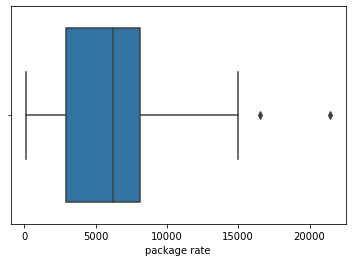

In [21]:
# boxplot and histogram for the distribution of package price
sn.boxplot(data=clean_data,x='package rate')

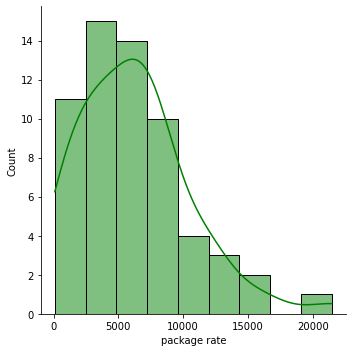

In [119]:
sn.displot(clean_data,x='package rate',kde=True,color='g')

-  50 percent of the places available for affordable prices, falls below __Rs 6200__.
-  Interestingly, there are two outliers that sharply differes from others, has very high package rate. one is __Ooty__(Tamil      Nadu) and the other is __Sonamarg__(Jammu & kashmir). Their length of trip time is high compared to others, Ooty package        is 6 nights, Sonamarg package is 4 nights. That's why their price is sharply high.   
-  The distribution is right skewed and above the 50th quartile the frequency is low. that is
   high rated packages are less in number.